In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lbs.localpdb import PDB

### Import PDB and load data.
##### Common filters applies filtering according to resolution (removes entries > 4A), method (remove non X-ray entries) and selects sequences longer than 25 amino acids.

In [3]:
pdb = PDB(db_path='/home/db/pdb', common_filters=True)

### <b>PDB object has two main attributes:</b>
- <i>pdb.structures</i> - stores the information about the <b>full assemblies</b>
- <i>pdb.chains</i> - stores the information about the <b>single chains</b> in the assemblies

### <b>which are pandas dataframes storing the data.</b>

In [4]:
pdb.chains.head()

,type,method,resolution,seq
101m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
102l_A,prot,diffraction,1.74,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...
102m_A,prot,diffraction,1.84,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...
103l_A,prot,diffraction,1.90,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...
103m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...


In [5]:
pdb.structures.head()

,type,method,resolution,fn_struct,fn_bio
4qig,prot,diffraction,3.297,/home/db/pdb/structures/qi/4qig.pdb,/home/db/pdb/biounits/qi/4qig.pdb1
5z5i,prot,diffraction,1.700,/home/db/pdb/structures/z5/5z5i.pdb,/home/db/pdb/biounits/z5/5z5i.pdb1
3ve2,prot,diffraction,2.140,/home/db/pdb/structures/ve/3ve2.pdb,/home/db/pdb/biounits/ve/3ve2.pdb1
4kmb,prot,diffraction,2.000,/home/db/pdb/structures/km/4kmb.pdb,/home/db/pdb/biounits/km/4kmb.pdb1
4umv,prot,diffraction,3.200,/home/db/pdb/structures/um/4umv.pdb,/home/db/pdb/biounits/um/4umv.pdb1


### You can load clustering information to the <i>pdb.chain</i> dataframe:

In [6]:
pdb.load_clustering_data(identity='50', method='blast')

In [7]:
pdb.chains.head()

,type,method,resolution,seq,blast-50
101m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106
102l_A,prot,diffraction,1.74,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,37
102m_A,prot,diffraction,1.84,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106
103l_A,prot,diffraction,1.90,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,37
103m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,106


### Suppose you want to select best resolution entry from each cluster:
(Beware this removes clusters containing solely NMR structures which have no resolution)

In [8]:
df = pdb.chains.loc[pdb.chains.groupby(by='blast-50')['resolution'].idxmin().dropna()].sort_values(by='blast-50')

In [24]:
df.head()

,type,method,resolution,seq,blast-50
3d9a_H,prot,diffraction,1.20,DVQLQESGPSLVKPSQTLSLTCSVTGDSITSDYWSWIRKFPGNRLE...,1
3ku3_B,prot,diffraction,1.60,GLFGAIAGFIEGGWQGMVDGWYGYHHSNDQGSGYAADKESTQKAFD...,10
2vxn_A,prot,diffraction,0.82,MSAKPQPIAAANWKCNGTTASIEKLVQVFNEHTISHDVQCVVAPTF...,100
5b4t_A,prot,diffraction,1.19,MLKGKKAVVTGSTSGIGLAMATELAKAGADVVINGFGQPEDIERER...,1000
3gj3_B,prot,diffraction,1.79,GPLGSGTWDCDTCLVQNKPEAVKCVACETPKPG,10000


In [25]:
df.shape

(31578, 5)

#### Example: Compare resolution distribution of all entries and selected representatives:

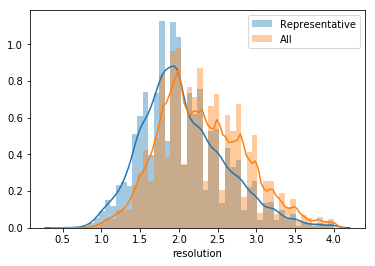

In [9]:
sns.distplot(df.resolution, label='Representative')
sns.distplot(pdb.chains.resolution, label='All')
plt.legend()

## Plugins!

### You can add functionality (additional columns in <i>pdb.structures</i> and <i>pdb.chains</i> by means of plugins
#### Currently available plugins are:
- <b>PDBMergeBio</b> (Stores extracted pdb biounits)
- <b>PDBChain</b> (Stores extracted PDB chains) 
- <b>DSSP</b> (Stores DSSP output of chains and biounits)
- <b>Socket</b> (Stores Socket output from biounits run)
- <b>PSSM</b> (Stores PSSM's of all sequences in <i>pdb.chains</i>
- <b>Master</b> (Sotres Master target files for all chains and biounits)

In [10]:
pdb = PDB(db_path='/home/db/pdb', common_filters=False, 
          plugins=['PDBMergeBio', 'PDBChain', 'DSSP', 'Socket', 'PSSM', 'Master'])

In [11]:
pdb.chains.head()

,type,method,resolution,seq,pdb_chain,dssp,pssm,master
101m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,/home/db/pdb/pdb_chain/01/101m_A.pdb,/home/db/pdb/dssp/01/101m_A.dssp,/home/db/psiblast/PSSM/1mtj_A.pssm,/home/db/pdb/master/01/101m_A.pds
102l_A,prot,diffraction,1.74,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,/home/db/pdb/pdb_chain/02/102l_A.pdb,/home/db/pdb/dssp/02/102l_A.dssp,/home/db/psiblast/PSSM/102l_A.pssm,/home/db/pdb/master/02/102l_A.pds
102m_A,prot,diffraction,1.84,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,/home/db/pdb/pdb_chain/02/102m_A.pdb,/home/db/pdb/dssp/02/102m_A.dssp,/home/db/psiblast/PSSM/102m_A.pssm,/home/db/pdb/master/02/102m_A.pds
103l_A,prot,diffraction,1.90,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,/home/db/pdb/pdb_chain/03/103l_A.pdb,/home/db/pdb/dssp/03/103l_A.dssp,/home/db/psiblast/PSSM/103l_A.pssm,/home/db/pdb/master/03/103l_A.pds
103m_A,prot,diffraction,2.07,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,/home/db/pdb/pdb_chain/03/103m_A.pdb,/home/db/pdb/dssp/03/103m_A.dssp,/home/db/psiblast/PSSM/102m_A.pssm,/home/db/pdb/master/03/103m_A.pds


In [12]:
pdb.structures.head()

,type,method,resolution,fn_struct,fn_bio,pdb_merge_bio,dssp,socket,master
101m,prot,diffraction,2.07,/home/db/pdb/structures/01/101m.pdb,/home/db/pdb/biounits/01/101m.pdb1,/home/db/pdb/pdb_merge_bio/01/101m.pdb1,/home/db/pdb/dssp/01/101m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/01/101m.pds
102l,prot,diffraction,1.74,/home/db/pdb/structures/02/102l.pdb,/home/db/pdb/biounits/02/102l.pdb1,/home/db/pdb/pdb_merge_bio/02/102l.pdb1,/home/db/pdb/dssp/02/102l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/02/102l.pds
102m,prot,diffraction,1.84,/home/db/pdb/structures/02/102m.pdb,/home/db/pdb/biounits/02/102m.pdb1,/home/db/pdb/pdb_merge_bio/02/102m.pdb1,/home/db/pdb/dssp/02/102m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/02/102m.pds
103l,prot,diffraction,1.90,/home/db/pdb/structures/03/103l.pdb,/home/db/pdb/biounits/03/103l.pdb1,/home/db/pdb/pdb_merge_bio/03/103l.pdb1,/home/db/pdb/dssp/03/103l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/03/103l.pds
103m,prot,diffraction,2.07,/home/db/pdb/structures/03/103m.pdb,/home/db/pdb/biounits/03/103m.pdb1,/home/db/pdb/pdb_merge_bio/03/103m.pdb1,/home/db/pdb/dssp/03/103m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/03/103m.pds


In [27]:
pdb.structures[pdb.structures['master'].isnull()]

,type,method,resolution,fn_struct,fn_bio,pdb_merge_bio,dssp,socket,master,cc_info
19hc,prot,diffraction,1.800,/home/db/pdb/structures/9h/19hc.pdb,/home/db/pdb/biounits/9h/19hc.pdb1,/home/db/pdb/pdb_merge_bio/9h/19hc.pdb1,/home/db/pdb/dssp/9h/19hc.dssp,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a34,prot-nuc,diffraction,1.810,/home/db/pdb/structures/a3/1a34.pdb,/home/db/pdb/biounits/a3/1a34.pdb1,NaN,NaN,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a4q,prot,diffraction,1.900,/home/db/pdb/structures/a4/1a4q.pdb,/home/db/pdb/biounits/a4/1a4q.pdb1,/home/db/pdb/pdb_merge_bio/a4/1a4q.pdb1,/home/db/pdb/dssp/a4/1a4q.dssp,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a54,prot,diffraction,1.600,/home/db/pdb/structures/a5/1a54.pdb,/home/db/pdb/biounits/a5/1a54.pdb1,NaN,NaN,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a8i,prot,diffraction,1.780,/home/db/pdb/structures/a8/1a8i.pdb,/home/db/pdb/biounits/a8/1a8i.pdb1,/home/db/pdb/pdb_merge_bio/a8/1a8i.pdb1,/home/db/pdb/dssp/a8/1a8i.dssp,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a9x,prot,diffraction,1.800,/home/db/pdb/structures/a9/1a9x.pdb,/home/db/pdb/biounits/a9/1a9x.pdb1,NaN,NaN,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a9y,prot,diffraction,1.800,/home/db/pdb/structures/a9/1a9y.pdb,/home/db/pdb/biounits/a9/1a9y.pdb1,/home/db/pdb/pdb_merge_bio/a9/1a9y.pdb1,/home/db/pdb/dssp/a9/1a9y.dssp,"{'74': 0, '72': 0, '70': 0}",NaN,0
1a9z,prot,diffraction,1.900,/home/db/pdb/structures/a9/1a9z.pdb,/home/db/pdb/biounits/a9/1a9z.pdb1,/home/db/pdb/pdb_merge_bio/a9/1a9z.pdb1,/home/db/pdb/dssp/a9/1a9z.dssp,"{'74': 0, '72': 0, '70': 0}",NaN,0
1abe,prot,diffraction,1.700,/home/db/pdb/structures/ab/1abe.pdb,/home/db/pdb/biounits/ab/1abe.pdb1,NaN,NaN,"{'74': 0, '72': 0, '70': 0}",NaN,0
1abf,prot,diffraction,1.900,/home/db/pdb/structures/ab/1abf.pdb,/home/db/pdb/biounits/ab/1abf.pdb1,NaN,NaN,"{'74': 0, '72': 0, '70': 0}",NaN,0


#### Example task #1: Get coiled coil domains in x-ray entries below 2A resolution

In [13]:
pdb.structures = pdb.structures[pdb.structures['method'] == 'diffraction']

In [14]:
pdb.structures = pdb.structures[pdb.structures['resolution'] <= 2.0]

In [15]:
from lbs.coiledcoils.socket import parse_socket_output

In [16]:
pdb.structures['cc_info'] = pdb.structures['socket'].apply(lambda x: parse_socket_output(x['74']))

In [17]:
pdb.structures

,type,method,resolution,fn_struct,fn_bio,pdb_merge_bio,dssp,socket,master,cc_info
102l,prot,diffraction,1.74,/home/db/pdb/structures/02/102l.pdb,/home/db/pdb/biounits/02/102l.pdb1,/home/db/pdb/pdb_merge_bio/02/102l.pdb1,/home/db/pdb/dssp/02/102l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/02/102l.pds,0
102m,prot,diffraction,1.84,/home/db/pdb/structures/02/102m.pdb,/home/db/pdb/biounits/02/102m.pdb1,/home/db/pdb/pdb_merge_bio/02/102m.pdb1,/home/db/pdb/dssp/02/102m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/02/102m.pds,0
103l,prot,diffraction,1.90,/home/db/pdb/structures/03/103l.pdb,/home/db/pdb/biounits/03/103l.pdb1,/home/db/pdb/pdb_merge_bio/03/103l.pdb1,/home/db/pdb/dssp/03/103l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/03/103l.pds,0
104m,prot,diffraction,1.71,/home/db/pdb/structures/04/104m.pdb,/home/db/pdb/biounits/04/104m.pdb1,/home/db/pdb/pdb_merge_bio/04/104m.pdb1,/home/db/pdb/dssp/04/104m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/04/104m.pds,0
106m,prot,diffraction,1.99,/home/db/pdb/structures/06/106m.pdb,/home/db/pdb/biounits/06/106m.pdb1,/home/db/pdb/pdb_merge_bio/06/106m.pdb1,/home/db/pdb/dssp/06/106m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/06/106m.pds,0
107l,prot,diffraction,1.80,/home/db/pdb/structures/07/107l.pdb,/home/db/pdb/biounits/07/107l.pdb1,/home/db/pdb/pdb_merge_bio/07/107l.pdb1,/home/db/pdb/dssp/07/107l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/07/107l.pds,0
108l,prot,diffraction,1.80,/home/db/pdb/structures/08/108l.pdb,/home/db/pdb/biounits/08/108l.pdb1,/home/db/pdb/pdb_merge_bio/08/108l.pdb1,/home/db/pdb/dssp/08/108l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/08/108l.pds,0
109l,prot,diffraction,1.85,/home/db/pdb/structures/09/109l.pdb,/home/db/pdb/biounits/09/109l.pdb1,/home/db/pdb/pdb_merge_bio/09/109l.pdb1,/home/db/pdb/dssp/09/109l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/09/109l.pds,0
109m,prot,diffraction,1.83,/home/db/pdb/structures/09/109m.pdb,/home/db/pdb/biounits/09/109m.pdb1,/home/db/pdb/pdb_merge_bio/09/109m.pdb1,/home/db/pdb/dssp/09/109m.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/09/109m.pds,0
110l,prot,diffraction,1.70,/home/db/pdb/structures/10/110l.pdb,/home/db/pdb/biounits/10/110l.pdb1,/home/db/pdb/pdb_merge_bio/10/110l.pdb1,/home/db/pdb/dssp/10/110l.dssp,"{'74': 0, '72': 0, '70': 0}",/home/db/pdb/master/10/110l.pds,0


In [19]:
pdb.structures[pdb.structures['cc_info'] != 0]

,type,method,resolution,fn_struct,fn_bio,pdb_merge_bio,dssp,socket,master,cc_info
1a92,prot,diffraction,1.800,/home/db/pdb/structures/a9/1a92.pdb,/home/db/pdb/biounits/a9/1a92.pdb1,/home/db/pdb/pdb_merge_bio/a9/1a92.pdb1,/home/db/pdb/dssp/a9/1a92.dssp,"{'74': '/home/db/pdb/socket/a9/1a92.cc_74', '7...",/home/db/pdb/master/a9/1a92.pds,"([{'indices': [(0, 20, 37, 'A'), (2, 21, 37, '..."
1aew,prot,diffraction,1.950,/home/db/pdb/structures/ae/1aew.pdb,/home/db/pdb/biounits/ae/1aew.pdb1,/home/db/pdb/pdb_merge_bio/ae/1aew.pdb1,/home/db/pdb/dssp/ae/1aew.dssp,"{'74': '/home/db/pdb/socket/ae/1aew.cc_74', '7...",NaN,"([{'indices': [(2, 97, 117, 'A'), (4, 141, 155..."
1afa,prot,diffraction,2.000,/home/db/pdb/structures/af/1afa.pdb,/home/db/pdb/biounits/af/1afa.pdb1,/home/db/pdb/pdb_merge_bio/af/1afa.pdb1,/home/db/pdb/dssp/af/1afa.dssp,"{'74': '/home/db/pdb/socket/af/1afa.cc_74', '7...",/home/db/pdb/master/af/1afa.pds,"([{'indices': [(0, 74, 102, '1'), (3, 74, 102,..."
1afb,prot,diffraction,1.900,/home/db/pdb/structures/af/1afb.pdb,/home/db/pdb/biounits/af/1afb.pdb1,/home/db/pdb/pdb_merge_bio/af/1afb.pdb1,/home/db/pdb/dssp/af/1afb.dssp,"{'74': '/home/db/pdb/socket/af/1afb.cc_74', '7...",/home/db/pdb/master/af/1afb.pds,"([{'indices': [(0, 74, 102, '1'), (3, 74, 102,..."
1afd,prot,diffraction,2.000,/home/db/pdb/structures/af/1afd.pdb,/home/db/pdb/biounits/af/1afd.pdb1,/home/db/pdb/pdb_merge_bio/af/1afd.pdb1,/home/db/pdb/dssp/af/1afd.dssp,"{'74': '/home/db/pdb/socket/af/1afd.cc_74', '7...",/home/db/pdb/master/af/1afd.pds,"([{'indices': [(0, 74, 99, '1'), (3, 74, 99, '..."
1ah7,prot,diffraction,1.501,/home/db/pdb/structures/ah/1ah7.pdb,/home/db/pdb/biounits/ah/1ah7.pdb1,/home/db/pdb/pdb_merge_bio/ah/1ah7.pdb1,/home/db/pdb/dssp/ah/1ah7.dssp,"{'74': '/home/db/pdb/socket/ah/1ah7.cc_74', '7...",/home/db/pdb/master/ah/1ah7.pds,"([{'indices': [(3, 91, 100, 'A'), (4, 109, 123..."
1aik,prot,diffraction,2.000,/home/db/pdb/structures/ai/1aik.pdb,/home/db/pdb/biounits/ai/1aik.pdb1,/home/db/pdb/pdb_merge_bio/ai/1aik.pdb1,/home/db/pdb/dssp/ai/1aik.dssp,"{'74': '/home/db/pdb/socket/ai/1aik.cc_74', '7...",/home/db/pdb/master/ai/1aik.pds,"([{'indices': [(0, 635, 656, 'C'), (1, 548, 56..."
1alu,prot,diffraction,1.900,/home/db/pdb/structures/al/1alu.pdb,/home/db/pdb/biounits/al/1alu.pdb1,/home/db/pdb/pdb_merge_bio/al/1alu.pdb1,/home/db/pdb/dssp/al/1alu.dssp,"{'74': '/home/db/pdb/socket/al/1alu.cc_74', '7...",/home/db/pdb/master/al/1alu.pds,"([{'indices': [(0, 25, 47, 'A'), (4, 160, 181,..."
1ap6,prot,diffraction,1.900,/home/db/pdb/structures/ap/1ap6.pdb,/home/db/pdb/biounits/ap/1ap6.pdb1,/home/db/pdb/pdb_merge_bio/ap/1ap6.pdb1,/home/db/pdb/dssp/ap/1ap6.dssp,"{'74': '/home/db/pdb/socket/ap/1ap6.cc_74', '7...",/home/db/pdb/master/ap/1ap6.pds,"([{'indices': [(11, 38, 49, 'B'), (12, 57, 67,..."
1aqv,prot,diffraction,1.940,/home/db/pdb/structures/aq/1aqv.pdb,/home/db/pdb/biounits/aq/1aqv.pdb1,/home/db/pdb/pdb_merge_bio/aq/1aqv.pdb1,/home/db/pdb/dssp/aq/1aqv.dssp,"{'74': '/home/db/pdb/socket/aq/1aqv.cc_74', '7...",/home/db/pdb/master/aq/1aqv.pds,"([{'indices': [(4, 93, 103, 'A'), (6, 151, 165..."
